2024.07.17 (수) - DAY12 머신러닝 4 / 이론 실습


# 1. 앙상블 기법: 배깅(Bagging) - Random Forest

Accuracy: 1.0


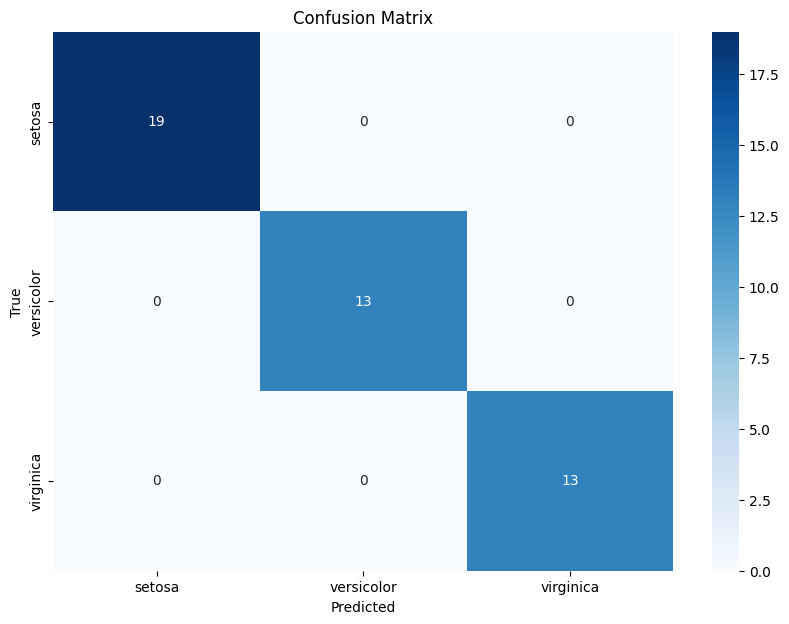

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Iris 데이터셋 로드
iris = load_iris()
X = iris.data
y = iris.target

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest 모델 생성
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 모델 학습
rf.fit(X_train, y_train)

# 예측 수행
y_pred = rf.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# 혼동 행렬 시각화
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 분류 리포트 출력
print(classification_report(y_test, y_pred, target_names=iris.target_names))


RandomForestClassifier의 n_estimators 매개변수는 랜덤 포레스트를 구성하는 의사결정 트리(decision tree)의 개수를 지정합니다.

일반적으로 100으로 설정됩니다.

#2. 앙상블 기법: 부스팅 (Boosting) - Gradient Boosting

Accuracy: 1.0


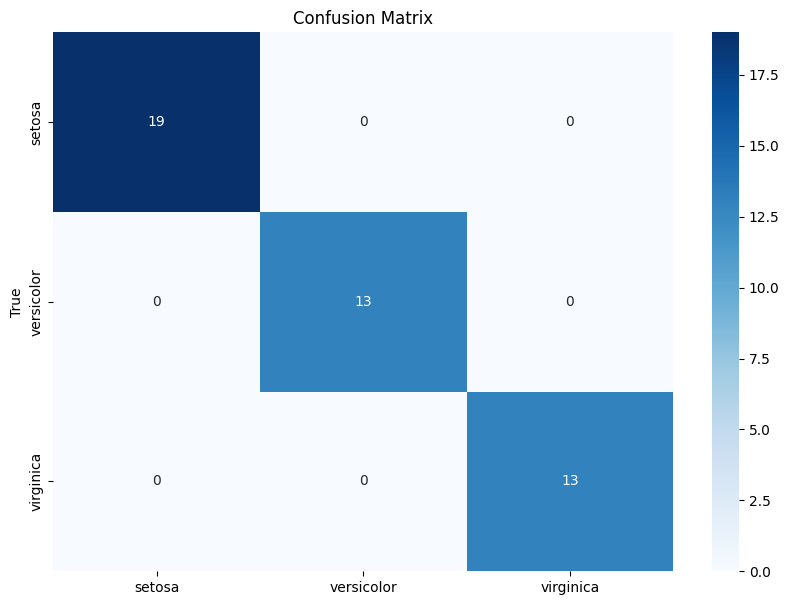

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Iris 데이터셋 로드
iris = load_iris()
X = iris.data
y = iris.target

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Gradient Boosting 모델 생성
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# 모델 학습
gb.fit(X_train, y_train)

# 예측 수행
y_pred = gb.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# 혼동 행력 시각화
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 분류 리포트 출력
print(classification_report(y_test, y_pred, target_names=iris.target_names))

GradientBoostingClassifier의 n_estimators 매개변수는 모델을 구성하는 개별 결정 트리의 수를 지정합니다. (일반적으로 100으로 설정됩니다.)

Gradient Boosting은 이전 트리의 오류를 보정하는 방식으로 트리를 순차적으로 추가하여 모델을 구축합니다.

#3. 앙상블 기법: 스태킹(Stacking)

In [ ]:
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Iris 데이터셋 로드로드
iris = load_iris()
X = iris.data
y = iris.target

# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 기본 모델 정의
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('svr', SVC(kernel='rbf', probability=True, random_state=42))
]

`estimators` 리스트는 두 개의 머신러닝 모델을 정의한 것입니다.

이 리스트는 이후에 여러 모델을 조합하여 앙상블 모델을 만들 때 사용할 수 있습니다.

### 구성 요소

1. **랜덤 포레스트 모델** (`rf`):
    - **클래스**: `RandomForestClassifier`
    - **매개변수**:
        - `n_estimators=10`: 10개의 결정 트리 사용
        - `random_state=42`: 결과 재현성을 위해 난수 시드 설정
2. **서포트 벡터 머신 모델** (`svr`):
    - **클래스**: `SVC`
    - **매개변수**:
        - `kernel='rbf'`: 방사 기저 함수(RBF) 커널 사용
        - `probability=True`: 확률 추정 가능하도록 설정
        - `random_state=42`: 결과 재현성을 위해 난수 시드 설정


위의 코드에서 kernel='rbf'는 서포트 벡터 머신(SVM) 모델에서 방사 기저 함수(Radial Basis Function, RBF) 커널을 사용하는 것을 의미합니다.
- 커널 함수는 비선형 데이터에 대해 더 잘 작동할 수 있도록 데이터를 고차원 공간으로 매핑하는 역할을 합니다.
- RBF 커널은 많은 비선형 분류 문제에서 좋은 성능을 보이는 커널 함수입니다.

In [ ]:
# 스태킹 모델 생성
stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

스태킹(스태킹 앙상블) 모델은 여러 개의 기본 학습기(base estimators)를 결합하여 예측 성능을 향상시키는 앙상블 방법 중 하나입니다. 각 기본 학습기는 독립적으로 학습된 후, 이들의 예측 결과를 입력(features)으로 사용하여 최종 예측기를 학습시킵니다. 이 최종 예측기를 `final_estimator`라고 합니다.

왜 로지스틱 회귀인가?

1. **단순성**:
    - 로지스틱 회귀는 비교적 단순한 모델로, 과적합(overfitting) 가능성이 적습니다. 이는 복잡한 모델들의 예측을 결합하는 데 유리합니다.
2. **해석 가능성**:
    - 로지스틱 회귀의 결과는 해석하기 쉽습니다. 예측 결과를 확률로 나타내며, 각 피처의 영향을 직관적으로 이해할 수 있습니다.
3. **결합의 효과성**:
    - 로지스틱 회귀는 여러 기본 모델의 예측을 결합할 때, 각 모델의 예측을 선형 결합하여 최종 결정을 내립니다. 이는 비선형성을 충분히 다룬 기본 모델들의 예측을 효율적으로 통합하는 데 효과적입니다.
4. **성능**:
    - 로지스틱 회귀는 다양한 상황에서 강력한 성능을 보입니다. 특히, 다양한 기본 모델들의 예측을 조합하는 경우, 단순한 선형 모델이 더 복잡한 최종 모델보다 오히려 좋은 성능을 발휘할 수 있습니다.
5. **적응성**:
    - 로지스틱 회귀는 기본 학습기들의 예측 결과를 입력으로 받아 이들을 적절히 가중치 조정하여 최적의 결합을 찾아냅니다.

이 코드에서 final_estimator=LogisticRegression()는 로지스틱 회귀를 최종 예측기로 사용하여, 랜덤 포레스트와 서포트 벡터 머신의 예측 결과를 결합하여 최종 예측을 수행합니다. 로지스틱 회귀는 기본 학습기들의 예측 결과를 효율적으로 통합하는 데 적합한 선택입니다.

Accuracy: 1.0


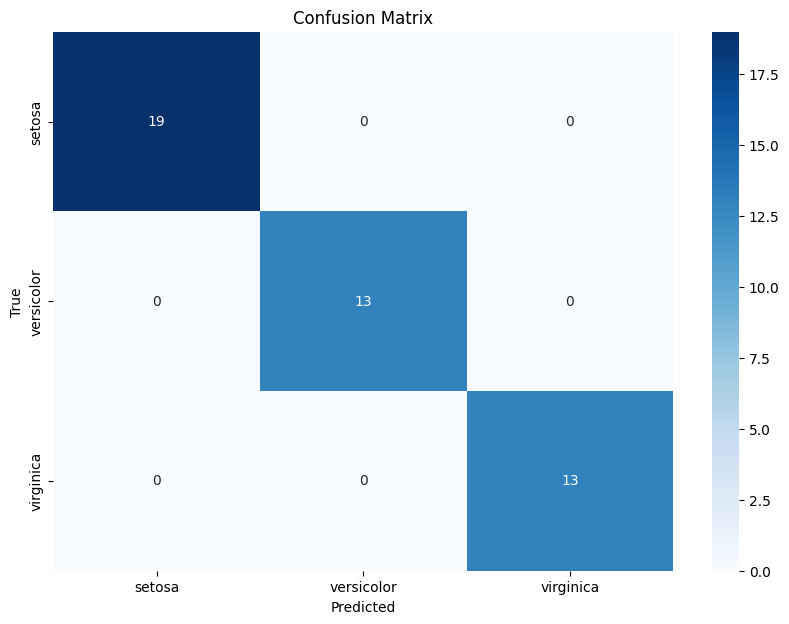

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
# 모델 학습
stacking.fit(X_train, y_train)

# 예측 수행
y_pred = stacking.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# 혼동 행렬 시각화
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 분류 리포트 출력
print(classification_report(y_test, y_pred, target_names=iris.target_names))

#4. 추천 알고리즘: 협업 필터링(Collaborative Filtering)

In [ ]:
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# 예제 사용자-아이템 매트릭스 생성
data = {
    'user_id': [1, 1, 1, 2, 2, 3, 3, 3, 4],
    'item_id': [1, 2, 3, 1, 3, 2, 3, 4, 4],
    'rating': [5, 4, 1, 4, 5, 2, 4, 5, 4]
}
df = pd.DataFrame(data)

# 사용자-아이템 매트릭스 생성
user_item_matrix = df.pivot_table(index='user_id', columns='item_id', values='rating').fillna(0)
print(user_item_matrix)

item_id    1    2    3    4
user_id                    
1        5.0  4.0  1.0  0.0
2        4.0  0.0  5.0  0.0
3        0.0  2.0  4.0  5.0
4        0.0  0.0  0.0  4.0


pivot_table 메소드를 사용하여 데이터프레임을 피벗하고, 각 사용자가 평가한 아이템의 평점을 매트릭스로 변환합니다.

이렇게 생성된 user_item_matrix는 각 사용자가 각 아이템에 대해 매긴 평점을 나타내는 매트릭스로, 평점이 없는 경우는 0으로 채워집니다.

In [ ]:
# 코사인 유사도를 사용하여 사용자 유사도 계산
user_similarity = cosine_similarity(user_item_matrix)

# 유사도를 데이터프레임으로 변환
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)
print(user_similarity_df)

user_id         1         2         3         4
user_id                                        
1        1.000000  0.602453  0.276026  0.000000
2        0.602453  1.000000  0.465620  0.000000
3        0.276026  0.465620  1.000000  0.745356
4        0.000000  0.000000  0.745356  1.000000


cosine_similarity 함수를 사용하여 사용자 간의 유사도를 계산합니다.

이 매트릭스에서 각 셀은 두 사용자의 유사도를 나타냅니다. 예를 들어, 사용자 1과 사용자 2의 유사도는 0.451145입니다.

코사인 유사도는 두 벡터 간의 코사인 각도를 사용하여 유사도를 측정하므로, 유사도가 1에 가까울수록 두 벡터는 매우 유사하다는 것을 의미합니다.

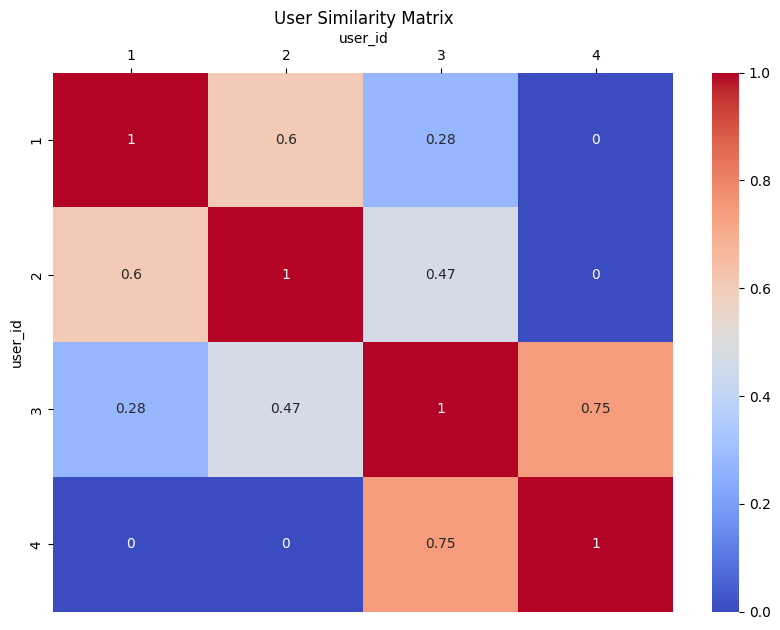

In [ ]:
# 유사도 매트릭스 시각화
plt.figure(figsize=(10, 7))
sns.heatmap(user_similarity_df, annot=True, cmap='coolwarm', xticklabels=user_item_matrix.index, yticklabels=user_item_matrix.index)

# xlabel을 그래프 위로 이동
plt.xticks(rotation=90)
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()

plt.title('User Similarity Matrix')
plt.show()

sns.heatmap의 xticklabels과 yticklabels 옵션을 설정하면 라벨이 자동으로 지정되므로, plt.xlabel()과 plt.ylabel()을 생략해도 됩니다.

In [ ]:
# 추천 함수 정의
def recommend(user_id, user_item_matrix, user_similarity, k=2):
    # 유사한 사용자 선택
    similar_users = user_similarity[user_id - 1]
    similar_users_indices = similar_users.argsort()[-k-1:-1]

    # 유사한 사용자들의 아이템 평균 평점 계산
    similar_users_ratings = user_item_matrix.iloc[similar_users_indices]
    recommendations = similar_users_ratings.mean(axis=0)

    # 이미 평가한 아이템 제외
    user_rated_items = user_item_matrix.loc[user_id]
    recommendations = recommendations[user_rated_items == 0]

    return recommendations.sort_values(ascending=False)

# 사용자 1에게 아이템 추천
recommendations = recommend(1, user_item_matrix, user_similarity)
print("Recommendations for user 1:")
print(recommendations)

Recommendations for user 1:
item_id
4    2.5
dtype: float64


1. 유사도 배열 추출:
`similar_users = user_similarity[user_id - 1]`
    - `user_similarity`는 사용자 간의 유사도를 나타내는 매트릭스입니다. 이 매트릭스의 `user_id - 1`번째 행을 선택하여, 주어진 사용자(`user_id`)와 다른 모든 사용자 간의 유사도를 추출합니다.
    - 예를 들어, `user_id`가 1인 경우, `user_similarity[0]`을 선택하여 첫 번째 사용자가 다른 모든 사용자와 얼마나 유사한지 나타내는 배열을 얻습니다.
2. 유사도 정렬 및 상위 k명 선택: `similar_users_indices = similar_users.argsort()[-k-1:-1]`
    - `similar_users.argsort()`는 유사도 배열을 정렬하여 원래 인덱스의 배열을 반환합니다. 예를 들어, `[0.1, 0.8, 0.5]` 배열을 정렬하면 `[0, 2, 1]`(오름차순)이 됩니다.
    - `[-k-1:-1]`는 상위 k명의 유사한 사용자를 선택합니다. 여기서 `1`을 추가로 사용하는 이유는 자신을 제외하기 위해서입니다.
        - `argsort()`의 결과에서 상위 k개의 인덱스를 선택하기 위해 슬라이싱을 사용합니다. 예를 들어, k=2인 경우, 상위 2명의 인덱스를 선택하기 위해 `[-3:-1]`을 사용합니다.
    - 예를 들어, `similar_users.argsort()`가 `[0, 2, 1]`이고 k=2인 경우, `[-3:-1]`은 `[0, 2]`가 됩니다. 이는 가장 유사한 2명의 사용자를 선택한 결과입니다.
    - 상위 k명 선택: `[-k-1:-1]`
        - `argsort()`의 결과는 오름차순으로 정렬된 인덱스 배열입니다.
        - 우리는 상위 k명의 유사한 사용자를 선택하려고 합니다. 따라서 상위 k명의 인덱스를 선택하기 위해 배열의 마지막 k+1개의 요소를 선택합니다.
        - <u>`k-1`에서 1을 추가로 사용하는 이유는 주어진 사용자 자신을 제외하기 위해서</u>입니다. <u>`user_id`와 동일한 인덱스를 가진 값은 항상 1.0이기 때문에 가장 큰 값 중 하나가 됩니다.</u> 따라서 이를 제외하고 상위 k명의 유사한 사용자를 선택합니다.
3. 사용자가 평가한 아이템 선택: `user_rated_items = user_item_matrix.loc[user_id]`
    - `user_item_matrix`는 사용자-아이템 매트릭스입니다. 이 매트릭스에서 `loc` 메소드를 사용하여 `user_id`에 해당하는 행을 선택합니다.
4. 이미 평가한 아이템 제외: `recommendations = recommendations[user_rated_items == 0]`
    - `recommendations`는 유사한 사용자들의 아이템 평균 평점을 나타내는 시리즈입니다.
    - `user_rated_items == 0` 조건은 사용자가 평가하지 않은 아이템을 찾는 논리적 조건입니다. 즉, `user_rated_items`에서 값이 0인 항목만을 선택합니다.
    - 이 조건을 `recommendations`에 적용하여, 사용자가 아직 평가하지 않은 아이템들만 남깁니다.
    - 예를 들어, `user_rated_items`이 `[5, 4, 1, 0]`인 경우, `user_rated_items == 0`은 `[False, False, False, True]`가 됩니다. 이 조건을 `recommendations`에 적용하면 사용자가 아직 평가하지 않은 아이템들만 남게 됩니다.
5. 추천 아이템 정렬 및 반환: `return recommendations.sort_values(ascending=False)`
    - 최종적으로, 사용자가 평가하지 않은 아이템들만 남은 `recommendations` 시리즈를 평점의 내림차순으로 정렬합니다.
    - `sort_values(ascending=False)`를 사용하여 평점이 높은 아이템이 상위에 오도록 정렬합니다.
    - 정렬된 추천 아이템 리스트를 반환합니다.


#### 정리
- 유사도 배열 추출: user_similarity에서 주어진 사용자와 다른 사용자 간의 유사도를 추출합니다.
- 유사도 정렬 및 상위 k명 선택: similar_users.argsort()로 상위 k명의 유사한 사용자를 선택합니다.
- 사용자가 평가한 아이템 선택: user_item_matrix.loc[user_id]로 사용자가 평가한 아이템을 선택합니다.
- 이미 평가한 아이템 제외: recommendations[user_rated_items == 0] 조건을 적용하여 사용자가 평가하지 않은 아이템만 남깁니다.
- 추천 아이템 정렬 및 반환: 평점이 높은 순으로 정렬하여 추천 아이템 리스트를 반환합니다.







# 5. 강화학습: Q-learning

In [ ]:
# 필요한 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 그리드월드 환경 정의
class GridWorld:
    def __init__(self, size):
        # 그리드의 크기를 설정합니다.
        self.size = size
        # 초기 상태를 (0, 0)으로 설정합니다.
        self.state = (0, 0)
        # 목표 상태를 그리드의 오른쪽 아래 모서리로 설정합니다.
        self.goal = (size-1, size-1)

    def reset(self):
        # 상태를 초기 상태로 리셋합니다.
        self.state = (0, 0)
        return self.state

    def step(self, action):
        # 현재 상태의 x, y 좌표를 가져옵니다.
        x, y = self.state
        # 행동에 따라 새로운 상태를 결정합니다.
        if action == 0:
            x = max(0, x - 1)
        elif action == 1:
            x = min(self.size - 1, x + 1) # 아래로 이동
        elif action == 2:
            y = max(0, y - 1) # 왼쪽으로 이동
        elif action == 3:
            y = min(self.size - 1, y + 1) # 오른쪽으로 이동

        # 새로운 상태를 설정합니다.
        self.state = (x, y)
        # 새로운 상태가 목표 상태인지 확인합니다.
        reward = 1 if self.state == self.goal else -0.1
        done = self.state == self.goal
        # 새로운 상태, 보상, 완료 여부를 반환합니다.
        return self.state, reward, done

# Q-learning 파라미터 설정
size = 5 # 그리드의 크기
env = GridWorld(size) # 그리드월드 환경 생성
q_table = np.zeros((size, size, 4)) # Q-테이블 초기화(상태-행동 가치 함수)
alpha = 0.1 # 학습률
gamma = 0.9 # 할인 인자
epsilon = 0.1 # 탐험 확률
episodes = 1000 # 학습 에피소드 수

# Q-learning 알고리즘
for episode in range(episodes):
    state = env.reset() # 에피소드 시작 상태를 초기화
    done = False # 에피소드가 끝났는지 여부

    while not done:
        if np.random.rand() < epsilon:
            action = np.random.choice(4) # 탐험: 무작위로 행동 선택
        else:
            action = np.argmax(q_table[state[0], state[1]]) # 활용: Q값이 최대인 행동 선택

        next_state, reward, done = env.step(action) # 환경에서 행동 수행
        q_value = q_table[state[0], state[1], action] # 현재 상태의 Q-값
        best_next_q_value = np.max(q_table[next_state[0], next_state[1]]) # 다음 상태에서의 최대 Q-값

        # Q-테이블 업데이트
        q_table[state[0], state[1], action] = q_value + alpha * (reward + gamma * best_next_q_value - q_value)

        state = next_state # 상태 업데이트

이 코드는 `GridWorld`라는 간단한 환경에서 Q-learning 알고리즘을 사용하여 에이전트가 목표 상태에 도달하는 방법을 학습하는 것을 보여줍니다.

1. GridWorld 환경 정의

- `GridWorld` 클래스는 격자 형태의 환경을 나타냅니다. 이 환경은 `size`로 정의된 크기의 격자로 구성되어 있습니다.
- `__init__` 메서드에서는 그리드의 크기를 설정하고, 초기 상태를 `(0, 0)`으로, 목표 상태를 오른쪽 아래 모서리 `(size-1, size-1)`로 설정합니다.
- `reset` 메서드는 환경을 초기 상태로 리셋하여 `(0, 0)` 상태를 반환합니다.
- `step` 메서드는 주어진 행동(action)에 따라 에이전트의 위치를 업데이트합니다. 행동은 4가지로 정의되어 있으며, 위(0), 아래(1), 왼쪽(2), 오른쪽(3)으로 이동하는 것을 나타냅니다. 이 메서드는 새로운 상태, 보상(reward), 그리고 목표 상태에 도달했는지 여부(done)를 반환합니다.

2. Q-learning 알고리즘

- Q-learning은 상태-행동 가치 함수를 업데이트하여 최적의 정책을 학습하는 강화 학습 알고리즘입니다.
- `q_table`은 각 상태에서의 각 행동에 대한 Q-값을 저장하는 테이블입니다. 초기에는 모든 값이 0으로 설정됩니다.
- 알고리즘은 여러 에피소드를 통해 학습하며, 각 에피소드는 환경의 초기 상태에서 시작하여 목표 상태에 도달할 때까지 진행됩니다.
- 에피소드 내에서 에이전트는 ε-탐욕 정책(ε-greedy policy)을 사용하여 행동을 선택합니다. 확률 ε로 무작위로 행동을 선택(탐험)하고, 그렇지 않으면 현재 Q-테이블에 기반하여 가장 큰 Q-값을 가진 행동을 선택(활용)합니다.
- 각 행동 후에, 새로운 상태와 보상, 그리고 에피소드가 완료되었는지 여부를 얻습니다. Q-값은 다음과 같은 식으로 업데이트됩니다:
Q(s,a)←Q(s,a)+α×(r+γ×a′maxQ(s′,a′)−Q(s,a))
여기서 `s`는 현재 상태, `a`는 현재 행동, `s'`는 다음 상태, `r`은 보상, `\alpha`는 학습률, `\gamma`는 할인 인자입니다.

이 과정이 반복되면서, Q-테이블은 최적의 행동 정책을 반영하게 되고, 에이전트는 목표 상태에 도달하는 효율적인 경로를 학습하게 됩니다.

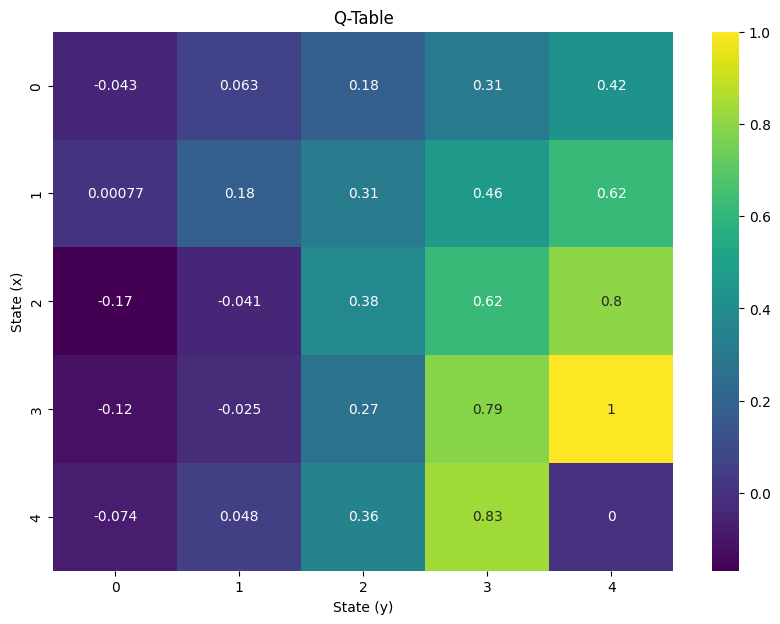

In [ ]:
# Q-테이블 시각화
# Q-learning 알고리즘에서 사용하는 상태-행동 가치 함수(State-Action Value Function)를 저장하는 테이블
# Q-테이블의 각 항목은 특정 상태에서 특정 행동을 취했을 때의 기대 보상을 나타냄

plt.figure(figsize=(10, 7))
sns.heatmap(np.max(q_table, axis=2), annot=True, cmap='viridis')
plt.title('Q-Table')
plt.xlabel('State (y)')
plt.ylabel('State (x)')
plt.show()

# 6. 하이퍼 파라미터 튜닝(Hyperparameter Tuning) - Grid Search

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01

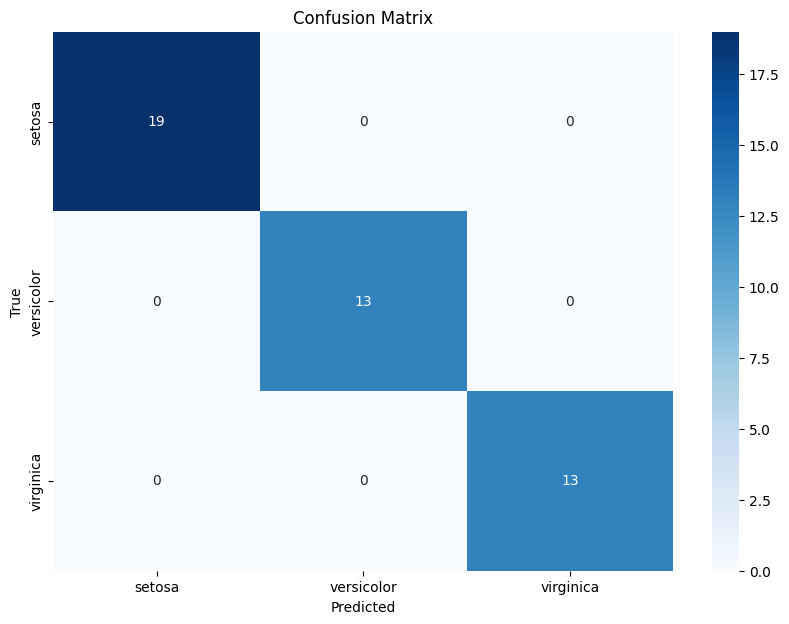

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [1]:
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Iris 데이터셋 로드
iris = load_iris()
X = iris.data
y = iris.target

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SVM 모델 생성
svc = SVC()

# 하이퍼 파라미터 그리드 정의
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.0001],
    'kernel': ['rbf']
}
# Grid Search
grid = GridSearchCV(svc, param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

# 최적 하이퍼 파라미터 출력
print(f'Best Parameters: {grid.best_params_}')

# 테스트 데이터로 예측 수행
y_pred = grid.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# 혼동 행렬 시각화
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 분류 리포트 출력
print(classification_report(y_test, y_pred, target_names=iris.target_names))

### 모델 생성

1. **SVM 모델(SVC) 생성**:
    
    ```python
    svc = SVC()
    ```
    
    - `SVC`는 scikit-learn에서 제공하는 SVM 분류기 클래스입니다. 기본적으로 `rbf`(Radial Basis Function) 커널을 사용합니다. 다른 커널로는 선형(`linear`), 다항식(`poly`), 시그모이드(`sigmoid`) 등이 있습니다.
    - 이 코드에서는 하이퍼파라미터 튜닝을 통해 `C`, `gamma`, `kernel`을 최적화할 계획이므로, 모델 생성 시 기본 설정을 사용합니다.

### 하이퍼파라미터 튜닝

1. **하이퍼파라미터 그리드 정의**:
    
    ```python
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'gamma': [1, 0.1, 0.01, 0.0001],
        'kernel': ['rbf']
    }
    ```
    
    - **`C`**: 오류에 대한 페널티를 제어하는 정규화 파라미터입니다. 큰 `C` 값은 오류를 줄이기 위해 더 작은 마진을 허용하며, 작은 `C` 값은 더 큰 마진을 허용하면서도 일부 오류를 허용합니다.
    - **`gamma`**: `rbf`, `poly`, `sigmoid` 커널에 사용되는 파라미터로, 개별 데이터 포인트의 영향력을 제어합니다. 큰 `gamma` 값은 더 좁은 영향을, 작은 `gamma` 값은 더 넓은 영향을 갖습니다.
    - **`kernel`**: 데이터의 변환 방식을 결정합니다. 이 예제에서는 `rbf` 커널만 사용합니다.
2. **Grid Search를 통한 최적화**:
    
    ```python
    grid = GridSearchCV(svc, param_grid, refit=True, verbose=2)
    grid.fit(X_train, y_train)
    ```
    
    - **`GridSearchCV`**: 주어진 하이퍼파라미터 그리드(`param_grid`)에서 가능한 모든 조합을 시도하여 최적의 파라미터 조합을 찾습니다.
    - **`refit=True`**: 최적의 파라미터로 전체 데이터에 대해 모델을 다시 학습시킵니다.
    - **`verbose=2`**: 진행 상황을 자세히 출력합니다.
    - **`fit(X_train, y_train)`**: 학습 데이터를 사용하여 모든 파라미터 조합에 대해 모델을 학습하고 평가합니다.
3. **최적 하이퍼파라미터 찾기**:
    - 최적의 하이퍼파라미터는 `grid.best_params_`를 통해 확인할 수 있으며, 이 파라미터 조합으로 모델이 다시 학습되어 최종 예측에 사용됩니다.